The Titanic project

In [1]:
#importing the libraries and the Titanic dataset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#df initially ingests the Titanic data
df = pd.read_csv('titanic_dataset.csv') #read the Titanic data

Exploratory Data Analysis

In [ ]:
sns.pairplot(data=df, vars = ['Survived', 'Pclass', 'Sex','Age','Fare','Embarked'])
plt.show()

In [ ]:
df.isnull().sum() #what fields have null values in them that I need to correct later?

In [ ]:
print(df.Embarked.mode())
print(df.Fare.mean())
print(type(df.Fare))
df.Fare.sort_values()

Running a categorical count bar chart on survival rates of the different Passenger Classes

In [ ]:
sns.catplot(x ="Pclass", hue ="Survived",
kind ="count", data = df)
plt.show()

It appears that First Class passengers are more likely to have survived and Third Class passengers are more likely to have perished

In [ ]:
sns.catplot(x ="Sex", hue ="Survived",
kind ="count", data = df)
plt.show()

In [ ]:
sns.catplot(x ="Embarked", hue ="Survived",
kind ="count", data = df)
plt.show()

In [ ]:
sns.catplot(x ="Parch", hue ="Survived",
kind ="count", data = df)
plt.show()

In [ ]:
sns.catplot(data=df, x="Survived", y="Fare", kind="box")
plt.show()

In [ ]:
sns.catplot(
    data=df, x="Fare", y="Sex", hue="Survived",
    kind="violin", bw=.25, cut=0, split=True,
)
plt.show()

In [ ]:
# Divide Fare into bins
df['Fare_Range'] = pd.qcut(df['Fare'], 12)
 
# Barplot - Shows approximate values based
# on the height of bars.
sns.barplot(x ='Fare_Range', y ='Survived',
data = df)
plt.show()

C:\Users\xAdmin\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


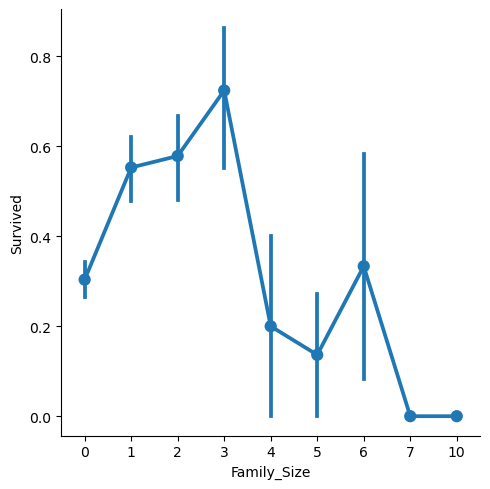

C:\Users\xAdmin\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


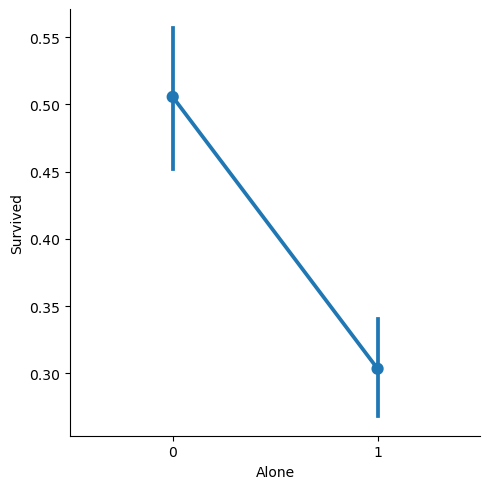

In [2]:
# Adding a column Family_Size
df['Family_Size'] = 0
df['Family_Size'] = df['Parch']+df['SibSp']
 
# Adding a column Alone
df['Alone'] = 0
df.loc[df.Family_Size == 0, 'Alone'] = 1
 
# Factorplot for Family_Size
sns.factorplot(x ='Family_Size', y ='Survived', data = df)
plt.show()
 
# Factorplot for Alone
sns.factorplot(x ='Alone', y ='Survived', data = df)
plt.show()

In [ ]:
sns.catplot(data=df, x="Age", y="Pclass", hue='Survived')
plt.show()

In [ ]:
df.Family_Size.value_counts()

In [ ]:
df.Alone.value_counts()

In [ ]:
df.head()

Data pre-processing

In [3]:
df['Embarked'] = df['Embarked'].fillna(df.Embarked.mode())
df['Age'] = df['Age'].fillna(df.Age.mean())
df_target = df.Survived
df_data = df.drop(['PassengerId', 'Survived', 'Name','SibSp','Parch','Ticket','Cabin'], axis=1)

In [4]:
#Scaling the numbers
from sklearn.preprocessing import StandardScaler
train_numerical_features = list(df_data.select_dtypes(include=['int64', 'float64', 'int32']).columns)
print(train_numerical_features)
ss_scaler = StandardScaler()
train_df_ss = pd.DataFrame(data = df_data)
train_df_ss[train_numerical_features] = ss_scaler.fit_transform(train_df_ss[train_numerical_features])
train_df_ss.head()

['Pclass', 'Age', 'Fare', 'Family_Size', 'Alone']


,Pclass,Sex,Age,Fare,Embarked,Family_Size,Alone
0,0.827377,male,-0.592481,-0.502445,S,0.059160,-1.231645
1,-1.566107,female,0.638789,0.786845,C,0.059160,-1.231645
2,0.827377,female,-0.284663,-0.488854,S,-0.560975,0.811922
3,-1.566107,female,0.407926,0.420730,S,0.059160,-1.231645
4,0.827377,male,0.407926,-0.486337,S,-0.560975,0.811922


In [5]:
#One hot encoding of categorical data
one_hot_Sex = pd.get_dummies(train_df_ss['Sex'])
train_df_ss = train_df_ss.join(one_hot_Sex)
one_hot_embarked = pd.get_dummies(train_df_ss['Embarked'])
train_df_ss = train_df_ss.join(one_hot_embarked)
#train_df_ss = train_df_ss.drop(['Sex','Embarked','male'], axis=1)
train_df_ss.head()
#print(type(df_data['male'])

,Pclass,Sex,Age,Fare,Embarked,Family_Size,Alone,female,male,C,Q,S
0,0.827377,male,-0.592481,-0.502445,S,0.059160,-1.231645,0,1,0,0,1
1,-1.566107,female,0.638789,0.786845,C,0.059160,-1.231645,1,0,1,0,0
2,0.827377,female,-0.284663,-0.488854,S,-0.560975,0.811922,1,0,0,0,1
3,-1.566107,female,0.407926,0.420730,S,0.059160,-1.231645,1,0,0,0,1
4,0.827377,male,0.407926,-0.486337,S,-0.560975,0.811922,0,1,0,0,1


In [6]:
train_df_ss = train_df_ss.drop(['Sex','Embarked','male'], axis=1)
train_df_ss.head()

,Pclass,Age,Fare,Family_Size,Alone,female,C,Q,S
0,0.827377,-0.592481,-0.502445,0.059160,-1.231645,0,0,0,1
1,-1.566107,0.638789,0.786845,0.059160,-1.231645,1,1,0,0
2,0.827377,-0.284663,-0.488854,-0.560975,0.811922,1,0,0,1
3,-1.566107,0.407926,0.420730,0.059160,-1.231645,1,0,0,1
4,0.827377,0.407926,-0.486337,-0.560975,0.811922,0,0,0,1


Model training

In [7]:
from sklearn.model_selection import cross_val_score 

In [37]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
#split prepared Titanic data between the test set (after the best model is chosen) 
#and the train set (which will be cross-validated) 
X_train, X_test, y_train, y_test = train_test_split(train_df_ss, df_target, test_size=0.2, random_state=83)



In [38]:
#cross-validate Logistic Regression model 
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)
print('Logistic Regression cross validation of training data: ' + str(cross_val_score(logreg, X_train, y_train, cv=10, scoring='accuracy').mean()))
print('Logistic Regression validation on test data: ' + str(metrics.accuracy_score(logreg.predict(X_test), y_test)) + '\n')

#cross-validate Nearest Neighbors model 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
print('KNN cross validation of training data: ' + str(cross_val_score(logreg, X_train, y_train, cv=10, scoring='accuracy').mean()))
print('KNN validation on test data: ' + str(metrics.accuracy_score(logreg.predict(X_test), y_test)) + '\n')

#cross-validate Gaussian Process model 
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
kernel = 1.0 * RBF([1.0])
gpc_rbf_isotropic = GaussianProcessClassifier(kernel=kernel).fit(X_train, y_train)
print('Gaussian Process Classifier cross validation of training data: ' + str(cross_val_score(gpc_rbf_isotropic, X_train, y_train, cv=10, scoring='accuracy').mean()))
print('Gaussian Process Classifier validation on test data: ' + str(metrics.accuracy_score(gpc_rbf_isotropic.predict(X_test), y_test)) + '\n')

#cross-validate naive bayes model 
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)  # GaussianNB itself does not support sample-weights
print('Naive Bayes cross validation of training data: ' + str(cross_val_score(gnb, X_train, y_train, cv=10, scoring='accuracy').mean()))
print('Naive Bayes validation on test data: ' + str(metrics.accuracy_score(gnb.predict(X_test), y_test)) + '\n')

#cross-validate Decision Tree model 
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)  # GaussianNB itself does not support sample-weights
print('Decision Tree cross validation of training data: ' + str(cross_val_score(dtc, X_train, y_train, cv=10, scoring='accuracy').mean()))
print('Decision Tree validation on test data: ' + str(metrics.accuracy_score(dtc.predict(X_test), y_test)) + '\n')

Logistic Regression cross validation of training data: 0.804773082942097
Logistic Regression validation on test data: 0.8100558659217877

KNN cross validation of training data: 0.804773082942097
KNN validation on test data: 0.8100558659217877

Gaussian Process Classifier cross validation of training data: 0.8118348982785604
Gaussian Process Classifier validation on test data: 0.8324022346368715

Naive Bayes cross validation of training data: 0.7809663536776215
Naive Bayes validation on test data: 0.8044692737430168

Decision Tree cross validation of training data: 0.7669014084507042
Decision Tree validation on test data: 0.770949720670391

